# A 2 layer shallow network for binary classification
In this assignment you will build a two layer network for the same cat vs non-cat binary classification problem. First, lets import the required packages. Note that we have copied the functions 'flatten', 'load_train_data' and 'load_test_data' functions to 'assign1_utils.py'.

In [1]:
import numpy as np
import matplotlib # for plotting
from matplotlib import pyplot as plt # for plotting
from tqdm import tqdm_notebook as tqdm
from assign1_utils import load_train_data, load_test_data, flatten

%matplotlib inline 

The architecture to be implemented is as follows:
Ip layer(I)----->hidden layer(H)------>op layer(O)

- Ip features shape: nx$^{[0]}$ x m (a batch of m samples each of dim nx. In this assignment, nx$^{[0]}$ will be 64\*64*3 = 12288).
- weights between I and H have shape: nx$^{[1]}$ x nx$^{[0]}$. nx$^{[1]}$ = 32.
- bias vector at H has shape: nx$^{[1]}$ x 1
- non-linearity at hidden layer is ReLU
- weights between H and O have shape: nx$^{[2]}$ x nx$^{[1]}$. nx$^{[2]}$ = 1.
- bias vector at H has shape: nx$^{[2]}$ x 1
- non-linearity at output layer is Sigmoid

The implementation will follow the python style pseudo-code listed in my lecture notes. 


First, you will complete the function that intializes weights and biases and returns them. Weight matrices have to be initialized similar to how weight vector was initialized in logistic regression. Bias vectors have to be initialized to zeros.

In [2]:
def initialize_params(nx):
    """
      Function that intializes weights to scaled random std normal values and biases to zero and returns them
      
      nx: a list that contains number of nodes in each layer in order. For a l-layer network, len(nx) = l+1 
          as it includes num of features in input layer also.
          
      returns W: list of numpy arrays of weight matrices
              b: list of numpy arrays of bias vectors
    """
    Wlist = []
    blist = []
    for i in range(1, len(nx)): 
        Wlist.append(np.random.randn(nx[i], nx[i-1]) * 0.01) # replace the ...; np.random.randn will be useful
        blist.append(np.zeros((nx[i], 1))) # replace the ...; np.zeros will be useful
    
    return Wlist, blist

In [3]:
# uncomment the following two lines to test your function

W, b = initialize_params([3, 2, 1])
[print(f'Shape of W[{i}]: {W[i].shape}, Shape of b[{i}]: {b[i].shape}') for i in range(len(W))]

Shape of W[0]: (2, 3), Shape of b[0]: (2, 1)
Shape of W[1]: (1, 2), Shape of b[1]: (1, 1)


[None, None]

Now you will complete forward, backward, update_params and part of the main function. Functions f and df are already comlete. Look at the code to understand what they do.

In [4]:
def f(z, fname = 'ReLU'):
    """
      computes and returns the non-linear function of z given the non-linearity
      
      z: numpy array of any shape on which the non-linearity will be applied elementwise
      fname: a string that is name of the non-linearity. Defaults to 'ReLU'. Other valid values are
             'Sigmoid', 'Tanh', and 'Linear'.
      
      returns f(z) f is the non-linear function whose name is fname
    """
    if fname == 'ReLU':
        return np.maximum(z, 0)
    elif fname == 'Sigmoid':
        return 1./(1+np.exp(-z))
    elif fname == 'Tanh':
        return np.tanh(z)
    elif fname == 'Linear':
        return z
    else:
        raise ValueError('Unknown non-linear function error')
        

In [5]:
def df(z, fname = 'ReLU'):
    """
      computes and returns the derivative of the non-linear function of z with respect to z
      
      z: numpy array of any shape 
      fname: a string that is name of the non-linearity. Defaults to 'ReLU'. Other valid values are
             'Sigmoid', 'Tanh', and 'Linear'.
      
      returns df/dz where f is the non-linear function of z. Name of the non-linear function is fname.
    """
    if fname == 'ReLU':
        return z>0
    elif fname == 'Sigmoid':
        sigma_z = 1./(1+np.exp(-z))
        return sigma_z * (1-sigma_z)
    elif fname == 'Tanh':
        return 1 - np.tanh(z)**2
    elif fname == 'Linear':
        return np.ones(z.shape)
    else:
        raise ValueError('Unknown non-linear function error')

In [6]:
def forward(a, W, b, fname = 'ReLU'):
    """
      Forward propagates a through the current layer given W and b
      a: I/p activation from previous activation layer l-1 of shape nx[l-1] x m
      w: weight matrix of shape nx[l] x nx[l-1]
      b: bias vector of shape nx[l+1] x 1
      
      returns anew: the output activation from current layer of shape nx[l] x m
              cache: a tuple that contains current layer's linear computation z, previous layer's activation a,
                     current layer's activation anew and weight matrix W
    """
    # Fill rhs in the following 3 lines. No extra lines of code required.
    
    z = np.matmul(W, a) + b                       # np.dot or np.matmul or @ operator will be useful. Also understand numpy 
                               # broadcasting for adding vector b to product of W and a
    anew = f(z, fname)                   # function f defined above will be useful
    cache = (z, a, anew, W)                 # read the doc string for this function listed above and acoordingly fill rhs
    return anew, cache

In [7]:
def backward(da, cache, fname = 'ReLU'):
    """
      Backward propagates da through the current layer given da, cache and the non-linearity at the current layer
      da: derivative of loss with respect current layers activation a; shape is nx[l] x m
      cache: a tuple that contains current layer's linear computation z, previous layer's activation aprev,
                     current layer's activation a and weight matrix W between previous layer l-1 and current layer l
      fname: name of the non-linearity at current layer l; this will be helpful for local gradient computation in 
             chain rule
      
      returns dW: derivative of loss with respect to W; shape is nx[l] x nx[l-1]
              db: derivative of loss with respect to b; shape is nx[l] x 1
    """
    # Fill rhs in the following 5 lines. No extra lines of code required.
    
    z, aprev, a, W = cache                     # extract from cache
    dz = da * df(z, fname)                     # compute dz as incoming grad da * local grad. For local grad, function df defined 
                                               # above will be useful
    dW = np.matmul(dz, aprev.T)                # np.dot or np.amtmul or @ operator will be useful. Also .T will be useful for 
                                               # transposing
    db = np.sum(dz, axis=1, keepdims=True)     # np.sum will be useful
    daprev = np.matmul(W.T, dz)               # np.dot or np.amtmul or @ operator will be useful. Also .T will be useful for 
                                               # transposing
    return daprev, dW, db

In [8]:
def update_params(Wlist, blist, dWlist, dblist, alpha):
    """
      Updates all the parameters using gradient descent rule
      
      Wlist: a lsit of all weight matrices to be updated
      blist: a list of bias vectors to be updated
      dWlist: a list of gradients of loss with respect to weight matrices
      dblist: a list of gradients of loss with respect to bias vectors
      alpha: learning rate
    """
    for i in range(len(Wlist)):
        Wlist[i] -= alpha * dWlist[i]         # fill rhs
        blist[i] -= alpha * dblist[i]         # fill rhs
        # ADDED
#         print(dWlist[0], dblist[0])
#         print("\n")

In [16]:
# def main(): # main function to train the model
def train(lr = 0.001, iters = 5000, n_layers = 2, n_x = [64*64*3, 32, 1], fun_name_list = ['ReLU', 'Sigmoid']) :   
    # load train data
    a0, y = load_train_data()
    a0 = flatten(a0)
    a0 = a0/255. # normalize the data to [0, 1]    
    
    # set some hyperparameters and epsilon
#     alpha = 0.001    
    alpha = lr    
#     miter = 5000
    miter = iters
    epsilon = 1e-6
#     num_layers = 2
    num_layers = n_layers
#     nx = [a0.shape[0], 32, 1]
    nx = n_x
#     print('sai: ',nx)
    m = a0.shape[1]
#     fname_list = ['ReLU', 'Sigmoid']
    fname_list = fun_name_list
    
    loss1, loss2, loss3 = np.inf, np.inf, np.inf
    
    # initialize weights and biases
    np.random.seed(24)
    Wlist, blist = initialize_params(nx)      # fill rhs 
    loss = []
    # initialize list of caches from each layer, gradients of weights at each layer, gradients of biases at
    # each layer to empty
    cache, dWlist, dblist = ([None]*num_layers for i in range(3))
    
    for i in range(miter):
        a = a0
        # forward propagate through each layer
        for l in range(num_layers):
            a, cache[l] = forward(a, Wlist[l], blist[l], fname_list[l])                       # Fill rhs. call forward function with 
                                                # appropriate arguments

        L  = (-1/m) * np.sum(y * np.log(a) + (1-y) * np.log(1-a), axis=1)                                    # Fill rhs. compute loss L
        
#         loss1 = loss2
#         loss2 = loss3
#         loss3 = L
        
#         if L > loss2 and loss2 < loss1:
#             alpha = alpha / 2.0
#             print("updated alpha: ", alpha)
        if i+1 % 10000 == 0:
            alpha = alpha / 2.0
            print("updated alpha: ", alpha)
            
        da = (1/m) * (a - y) * (1 / ((a * (1 - a)) + epsilon))                                 # Fill rhs. compute da

        # backward propagate through each layer to compute gradients
        for l in range(num_layers-1, -1, -1):
            da, dWlist[l], dblist[l] =  backward(da, cache[l], fname_list[l])                 # Fill rhs. call backward function with 
                                                        # appropriate arguments

        # update_params
        update_params(Wlist, blist, dWlist, dblist, alpha)          # Replace ...; call update_params function with appropriate arguments
        loss.append(L)
        if not i%100: # print loss every 100 iterations
                print(f'Loss at iteration {i}:\t{np.asscalar(L):.8f}')
                print(f'train accuracy: {test_model(a0, y, Wlist, blist, fun_name_list) * 100:.2f}%')
                print('\n')
                
    return Wlist, blist, loss

In [10]:
def main(): # main function to train the model
# def train(lr = 0.001, iters = 5000, n_layers = 2, n_x = [batch_size, 32, 1], fun_name_list = ['ReLU', 'Sigmoid'])    
    # load train data
    a0, y = load_train_data()
    a0 = flatten(a0)
    a0 = a0/255. # normalize the data to [0, 1]    
    
    # set some hyperparameters and epsilon
    alpha = 0.01    
    miter = 2000
    epsilon = 1e-6
    num_layers = 2
    nx = [a0.shape[0], 32, 1]
    m = a0.shape[1]
    fname_list = ['ReLU', 'Sigmoid']
    # initialize weights and biases
    Wlist, blist = initialize_params(nx)      # fill rhs 
    
    # initialize list of caches from each layer, gradients of weights at each layer, gradients of biases at
    # each layer to empty
    cache, dWlist, dblist = ([None]*num_layers for i in range(3))
    dw_list = [[0] * miter, [0] * miter]
    for i in range(miter):
        a = a0
        # forward propagate through each layer
        for l in range(num_layers):
            a, cache[l] = forward(a, Wlist[l], blist[l], fname_list[l])                       # Fill rhs. call forward function with 
                                                # appropriate arguments

        L  = (-1/m) * np.sum(y * np.log(a) + (1-y) * np.log(1-a), axis=1)                              # Fill rhs. compute loss L
        
        
        
        da = (1/m) * (a - y) * (1 / ((a * (1 - a)) + epsilon))                                 # Fill rhs. compute da

        # backward propagate through each layer to compute gradients
        for l in range(num_layers-1, -1, -1):
            da, dWlist[l], dblist[l] =  backward(da, cache[l], fname_list[l])                 # Fill rhs. call backward function with 
            dw_list[l][i] = np.linalg.norm(dWlist[l])                                            # appropriate arguments
        # update_params
        update_params(Wlist, blist, dWlist, dblist, alpha)          # Replace ...; call update_params function with appropriate arguments
        
        if not i%100: # print loss every 100 iterations
                print(f'Loss at iteration {i}:\t{np.asscalar(L):.4f}')
#                 for j in range(len(Wlist)):
#                     print("Norm(dW)",j,": ",np.linalg.norm(dWlist[j]))
    
#     x_axis = [i for i in range(1, miter + 1)]
#     colours = ['b', 'r']
#     for i in range(num_layers):
#         plt.plot(x_axis, dw_list[i], colours[i], label = 'dWlist['+str(i)+']')
#     plt.legend()
#     plt.xlabel("")
#     plt.show()

                
    return Wlist, blist

In [11]:
if __name__ == '__main__':
    Wlist, blist = main()

Loss at iteration 0:	0.6961
Loss at iteration 100:	0.6372
Loss at iteration 200:	0.5972
Loss at iteration 300:	0.5319
Loss at iteration 400:	0.4537
Loss at iteration 500:	0.4351
Loss at iteration 600:	0.3945
Loss at iteration 700:	0.3447
Loss at iteration 800:	0.2979
Loss at iteration 900:	0.2175
Loss at iteration 1000:	0.3820
Loss at iteration 1100:	0.1478
Loss at iteration 1200:	0.1013
Loss at iteration 1300:	0.0767
Loss at iteration 1400:	0.0637
Loss at iteration 1500:	0.0510
Loss at iteration 1600:	0.0427
Loss at iteration 1700:	0.0367
Loss at iteration 1800:	0.0318
Loss at iteration 1900:	0.0279


Let's now test the model.

In [12]:
fname_list = ['ReLU', 'Sigmoid']
num_layers = 2
def predict(a, Wlist, blist, fname_list):
    for l in range(num_layers):
            a, _ = forward(a, Wlist[l], blist[l], fname_list[l])
    predictions = np.zeros_like(a)
    predictions[a > 0.5] = 1
    return predictions

def test_model(a, y, Wlist, blist, fname_list):
    predictions = predict(a, Wlist, blist, fname_list)
    acc = np.mean(predictions == y)
    acc = np.asscalar(acc)
    return acc

x, y = load_train_data()
x = flatten(x)
x = x/255. # normalize the data to [0, 1]
print(f'train accuracy: {test_model(x, y, Wlist, blist, fname_list) * 100:.2f}%')

x, y = load_test_data()
x = flatten(x)
x = x/255. # normalize the data to [0, 1]
print(f'test accuracy: {test_model(x, y, Wlist, blist, fname_list) * 100:.2f}%')

train accuracy: 100.00%
test accuracy: 74.00%


# Questions
### 1. Why has the test accuracy not improved with this 2-layer network? Explain.

#### Ans: We see that the train accuracy has reached 100% while the test accuracy remains below 80%. Clearly, this is the case of overfitting. I feel the reason for this can be either presence of noise or lack of representative samples.

### 2. How does replacement of ReLU by Sigmoid at the hidden layer affect the model?

In [17]:
#for train(lr = 0.001, iters = 5000, n_layers = 2, n_x = [64*64*3, 32, 1], fun_name_list = ['ReLU', 'Sigmoid'])
n_layers = 2
n_x = [64*64*3, 32, 1]
fun_name_list = ['Sigmoid', 'Sigmoid']
Wlist, blist, losses = train(lr = 0.01, iters = 2000, n_layers = n_layers, n_x = n_x, fun_name_list = fun_name_list)

Loss at iteration 0:	0.69115135
train accuracy: 65.55%


Loss at iteration 100:	0.64376420
train accuracy: 65.55%


Loss at iteration 200:	0.64151756
train accuracy: 65.55%


Loss at iteration 300:	0.63869933
train accuracy: 65.55%


Loss at iteration 400:	0.63515441
train accuracy: 65.55%


Loss at iteration 500:	0.63094570
train accuracy: 65.55%


Loss at iteration 600:	0.62611108
train accuracy: 65.55%


Loss at iteration 700:	0.62067883
train accuracy: 65.55%


Loss at iteration 800:	0.61466883
train accuracy: 65.55%


Loss at iteration 900:	0.60808107
train accuracy: 65.55%


Loss at iteration 1000:	0.60088547
train accuracy: 65.55%


Loss at iteration 1100:	0.59302904
train accuracy: 65.55%


Loss at iteration 1200:	0.58446466
train accuracy: 65.55%


Loss at iteration 1300:	0.57513294
train accuracy: 65.55%


Loss at iteration 1400:	0.56490314
train accuracy: 65.55%


Loss at iteration 1500:	0.55359772
train accuracy: 65.07%


Loss at iteration 1600:	0.54119290
train accuracy: 6

In [18]:
x, y = load_train_data()
x = flatten(x)
x = x/255. # normalize the data to [0, 1]
print(f'train accuracy: {test_model(x, y, Wlist, blist, fun_name_list) * 100:.2f}%')

x, y = load_test_data()
x = flatten(x)
x = x/255. # normalize the data to [0, 1]
print(f'test accuracy: {test_model(x, y, Wlist, blist, fun_name_list) * 100:.2f}%')

train accuracy: 75.12%
test accuracy: 60.00%


#### We see that the decrease in the loss has slowed down if we change ReLU to sigmoid. This is because of the fact that with increase in the absolute value of $z$,  $sigmoid(z)$ becomes increasingly small leading to smaller updates in weights.

### 3. Expand the 2 layer network to, say a 4 layer network of your choice. How does this model compare to logistic regresion and 2-layer network?

In [23]:
#for train(lr = 0.001, iters = 5000, n_layers = 2, n_x = [64*64*3, 32, 1], fun_name_list = ['ReLU', 'Sigmoid'])
n_layers = 4
np.random.seed(2)
n_x = [64*64*3, 32, 8, 2, 1]
fun_name_list = ['ReLU', 'ReLU', 'ReLU', 'Sigmoid']
Wlist, blist, losses = train(lr = 0.01, iters = 30000, n_layers = n_layers, n_x = n_x, fun_name_list = fun_name_list)

Loss at iteration 0:	0.69314715
train accuracy: 65.55%


Loss at iteration 100:	0.67409575
train accuracy: 65.55%


Loss at iteration 200:	0.66251993
train accuracy: 65.55%


Loss at iteration 300:	0.65545215
train accuracy: 65.55%


Loss at iteration 400:	0.65111178
train accuracy: 65.55%


Loss at iteration 500:	0.64843110
train accuracy: 65.55%


Loss at iteration 600:	0.64676693
train accuracy: 65.55%


Loss at iteration 700:	0.64572917
train accuracy: 65.55%


Loss at iteration 800:	0.64507961
train accuracy: 65.55%


Loss at iteration 900:	0.64467176
train accuracy: 65.55%


Loss at iteration 1000:	0.64441501
train accuracy: 65.55%


Loss at iteration 1100:	0.64425305
train accuracy: 65.55%


Loss at iteration 1200:	0.64415071
train accuracy: 65.55%


Loss at iteration 1300:	0.64408596
train accuracy: 65.55%


Loss at iteration 1400:	0.64404494
train accuracy: 65.55%


Loss at iteration 1500:	0.64401893
train accuracy: 65.55%


Loss at iteration 1600:	0.64400243
train accuracy: 6

Loss at iteration 13700:	0.64397366
train accuracy: 65.55%


Loss at iteration 13800:	0.64397366
train accuracy: 65.55%


Loss at iteration 13900:	0.64397366
train accuracy: 65.55%


Loss at iteration 14000:	0.64397366
train accuracy: 65.55%


Loss at iteration 14100:	0.64397366
train accuracy: 65.55%


Loss at iteration 14200:	0.64397366
train accuracy: 65.55%


Loss at iteration 14300:	0.64397366
train accuracy: 65.55%


Loss at iteration 14400:	0.64397366
train accuracy: 65.55%


Loss at iteration 14500:	0.64397366
train accuracy: 65.55%


Loss at iteration 14600:	0.64397366
train accuracy: 65.55%


Loss at iteration 14700:	0.64397366
train accuracy: 65.55%


Loss at iteration 14800:	0.64397366
train accuracy: 65.55%


Loss at iteration 14900:	0.64397366
train accuracy: 65.55%


Loss at iteration 15000:	0.64397366
train accuracy: 65.55%


Loss at iteration 15100:	0.64397366
train accuracy: 65.55%


Loss at iteration 15200:	0.64397366
train accuracy: 65.55%


Loss at iteration 15300:

Loss at iteration 27200:	0.64397361
train accuracy: 65.55%


Loss at iteration 27300:	0.64397361
train accuracy: 65.55%


Loss at iteration 27400:	0.64397361
train accuracy: 65.55%


Loss at iteration 27500:	0.64397361
train accuracy: 65.55%


Loss at iteration 27600:	0.64397361
train accuracy: 65.55%


Loss at iteration 27700:	0.64397361
train accuracy: 65.55%


Loss at iteration 27800:	0.64397360
train accuracy: 65.55%


Loss at iteration 27900:	0.64397360
train accuracy: 65.55%


Loss at iteration 28000:	0.64397360
train accuracy: 65.55%


Loss at iteration 28100:	0.64397360
train accuracy: 65.55%


Loss at iteration 28200:	0.64397360
train accuracy: 65.55%


Loss at iteration 28300:	0.64397360
train accuracy: 65.55%


Loss at iteration 28400:	0.64397360
train accuracy: 65.55%


Loss at iteration 28500:	0.64397360
train accuracy: 65.55%


Loss at iteration 28600:	0.64397360
train accuracy: 65.55%


Loss at iteration 28700:	0.64397360
train accuracy: 65.55%


Loss at iteration 28800:

In [20]:
x, y = load_train_data()
x = flatten(x)
x = x/255. # normalize the data to [0, 1]
print(f'train accuracy: {test_model(x, y, Wlist, blist, fun_name_list) * 100:.2f}%')

x, y = load_test_data()
x = flatten(x)
x = x/255. # normalize the data to [0, 1]
print(f'test accuracy: {test_model(x, y, Wlist, blist, fun_name_list) * 100:.2f}%')

train accuracy: 64.32%
test accuracy: 49.75%


#### We see that the train and test accuracies have gone down. 
#### This model is a much more complex model compared to both the single neuron as well as the 2-layer models and it has failed to learn.

### 4. Play with a few learning rates and explain your observations.

In [21]:
n_layers = 2
iters = 6000
n_x = [64*64*3, 32, 1]
fun_name_list = ['ReLU', 'Sigmoid']
lrs = [0.01 + i*0.005 for i in range(-1, 3, 1)]
losses_for_lrs = [None] * len(lrs)
for i in tqdm(range(len(lrs))):
    Wlist, blist, losses_for_lrs[i] = train(lr = lrs[i], iters = iters, n_layers = 2, n_x = n_x, fun_name_list = fun_name_list)

    x, y = load_train_data()
    x = flatten(x)
    x = x/255. # normalize the data to [0, 1]
    print("\n\nFor lr = ", lrs[i])
    print(f'train accuracy: {test_model(x, y, Wlist, blist, fun_name_list) * 100:.2f}%')

    x, y = load_test_data()
    x = flatten(x)
    x = x/255. # normalize the data to [0, 1]
    print(f'test accuracy: {test_model(x, y, Wlist, blist, fun_name_list) * 100:.2f}%')
    print("\n\n")

Loss at iteration 0:	0.69190731
train accuracy: 65.55%


Loss at iteration 100:	0.64561201
train accuracy: 65.55%


Loss at iteration 200:	0.63608484
train accuracy: 65.55%


Loss at iteration 300:	0.61991669
train accuracy: 65.55%


Loss at iteration 400:	0.59503117
train accuracy: 65.55%


Loss at iteration 500:	0.56490897
train accuracy: 66.51%


Loss at iteration 600:	0.53039603
train accuracy: 71.29%


Loss at iteration 700:	0.49180244
train accuracy: 76.56%


Loss at iteration 800:	0.45060302
train accuracy: 80.38%


Loss at iteration 900:	0.40886277
train accuracy: 86.60%


Loss at iteration 1000:	0.36726491
train accuracy: 88.52%


Loss at iteration 1100:	0.32733606
train accuracy: 90.43%


Loss at iteration 1200:	0.28982319
train accuracy: 93.30%


Loss at iteration 1300:	0.25534617
train accuracy: 94.26%


Loss at iteration 1400:	0.22429118
train accuracy: 95.22%


Loss at iteration 1500:	0.19853416
train accuracy: 95.69%


Loss at iteration 1600:	0.17116488
train accuracy: 9

Loss at iteration 1400:	0.02831880
train accuracy: 100.00%


Loss at iteration 1500:	0.02367308
train accuracy: 100.00%


Loss at iteration 1600:	0.02014927
train accuracy: 100.00%


Loss at iteration 1700:	0.01737470
train accuracy: 100.00%


Loss at iteration 1800:	0.01520032
train accuracy: 100.00%


Loss at iteration 1900:	0.01344417
train accuracy: 100.00%


Loss at iteration 2000:	0.01199731
train accuracy: 100.00%


Loss at iteration 2100:	0.01080615
train accuracy: 100.00%


Loss at iteration 2200:	0.00979381
train accuracy: 100.00%


Loss at iteration 2300:	0.00893974
train accuracy: 100.00%


Loss at iteration 2400:	0.00820463
train accuracy: 100.00%


Loss at iteration 2500:	0.00757072
train accuracy: 100.00%


Loss at iteration 2600:	0.00701505
train accuracy: 100.00%


Loss at iteration 2700:	0.00652606
train accuracy: 100.00%


Loss at iteration 2800:	0.00609553
train accuracy: 100.00%


Loss at iteration 2900:	0.00571451
train accuracy: 100.00%


Loss at iteration 3000:	

6000


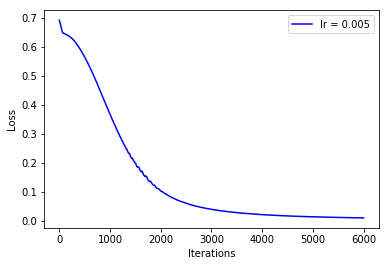

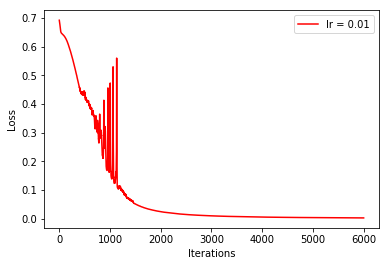

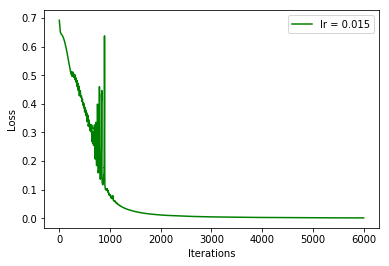

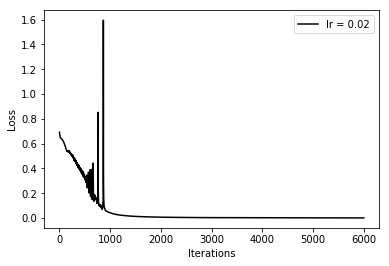

In [22]:
print(len(losses_for_lrs[0]))
x_axis = [i for i in range(1, iters+1)]
plt.plot(x_axis, losses_for_lrs[0], 'b', label = 'lr = ' + str(lrs[0]))
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.plot(x_axis, losses_for_lrs[1], 'r', label = 'lr = ' + str(lrs[1]))
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.plot(x_axis, losses_for_lrs[2], 'g', label = 'lr = ' + str(lrs[2]))
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.plot(x_axis, losses_for_lrs[3], 'k', label = 'lr = ' + str(lrs[3]))
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()
# plt.legend()
# plt.show()

#### We see that among the chosen learning rates, lr = 0.005 leads to least variations in the loss over the iterations. But, we also see that lr = 0.02 preforms best on the test data.

#### Note: All questions will be answered in the jupyter notebook only. Wherever code is required, you write and run the code in a code cell. For text, write and render in a markdown cell.